In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from pathlib import Path

# Каталог датасетов

In [ ]:
#local
data_cat = Path.cwd().parent.parent / 'datasets'
if Path.exists(data_cat):
    datasets = list(data_cat.glob('*.csv'))
    print(*list(map(lambda x: x.name, datasets)), sep='\n')

bike_bin.csv
bike_buyers_clean.csv
cancer patient data sets.csv
cancer_bin.csv
car.csv
car_bin.csv


In [13]:
#colab
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d thedevastator/cancer-patients-and-air-pollution-a-new-link
!kaggle datasets download -d heeraldedhia/bike-buyers
!kaggle datasets download -d subhajeetdas/car-acceptability-classification-dataset
!mkdir datasets
!unzip cancer-patients-and-air-pollution-a-new-link -d datasets
!unzip bike-buyers -d datasets
!unzip car-acceptability-classification-dataset -d datasets
data_cat = Path.cwd() / 'datasets'

cancer-patients-and-air-pollution-a-new-link.zip: Skipping, found more recently modified local copy (use --force to force download)
bike-buyers.zip: Skipping, found more recently modified local copy (use --force to force download)
car-acceptability-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘datasets’: File exists
Archive:  cancer-patients-and-air-pollution-a-new-link.zip
replace datasets/cancer patient data sets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  bike-buyers.zip
replace datasets/bike_buyers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  car-acceptability-classification-dataset.zip
replace datasets/car.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Датасет 1

In [14]:
df = pd.read_csv(data_cat/"cancer patient data sets.csv", index_col="index")

In [15]:
df.dtypes

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [17]:
for c in df.columns.drop(["Patient Id", "Age"]):
    print(c,pd.unique(df[c]))

Gender [1 2]
Air Pollution [2 3 4 7 6 5 1 8]
Alcohol use [4 1 5 7 8 3 6 2]
Dust Allergy [5 6 7 4 2 8 1 3]
OccuPational Hazards [4 3 5 7 2 6 8 1]
Genetic Risk [3 4 5 6 7 2 1]
chronic Lung Disease [2 4 7 6 3 5 1]
Balanced Diet [2 6 7 4 5 3 1]
Obesity [4 2 7 3 5 6 1]
Smoking [3 2 7 8 1 6 5 4]
Passive Smoker [2 4 3 7 6 8 5 1]
Chest Pain [2 4 7 3 6 5 9 8 1]
Coughing of Blood [4 3 8 9 1 5 7 6 2]
Fatigue [3 1 8 4 5 9 2 6]
Weight Loss [4 3 7 2 6 5 1 8]
Shortness of Breath [2 7 9 3 4 5 6 1]
Wheezing [2 8 1 4 6 7 5 3]
Swallowing Difficulty [3 6 1 4 2 5 8 7]
Clubbing of Finger Nails [1 2 4 5 6 8 7 9 3]
Frequent Cold [2 1 6 4 3 7 5]
Dry Cough [3 7 2 4 1 5 6]
Snoring [4 2 5 3 1 6 7]
Level ['Low' 'Medium' 'High']


In [25]:
raw_df = df[df.columns.drop(["Patient Id", "Age", "Level"])][df.Level != 'Medium']
raw_df

,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
index,,,,,,,,,,,,,,,,,,,,,
0,1,2,4,5,4,3,2,2,4,3,...,4,3,4,2,2,3,1,2,3,4
2,1,4,5,6,5,5,4,6,7,2,...,8,8,7,9,2,1,4,6,7,2
3,1,7,7,7,7,6,7,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,1,6,8,7,7,7,6,7,7,8,...,9,3,2,4,1,4,2,4,2,3
5,1,4,5,6,5,5,4,6,7,2,...,8,8,7,9,2,1,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,7,7,7,7,6,7,7,7,...,7,5,3,2,7,8,2,4,5,3
996,2,6,8,7,7,7,6,7,7,7,...,7,9,6,5,7,2,4,3,1,4
997,2,4,5,6,5,5,4,6,7,2,...,8,8,7,9,2,1,4,6,7,2


In [26]:
res_columns = ohe.get_feature_names_out(raw_df.columns)
res_columns

array(['Gender_1', 'Gender_2', 'Air Pollution_1', 'Air Pollution_2',
       'Air Pollution_3', 'Air Pollution_4', 'Air Pollution_5',
       'Air Pollution_6', 'Air Pollution_7', 'Air Pollution_8',
       'Alcohol use_1', 'Alcohol use_2', 'Alcohol use_3', 'Alcohol use_4',
       'Alcohol use_5', 'Alcohol use_6', 'Alcohol use_7', 'Alcohol use_8',
       'Dust Allergy_1', 'Dust Allergy_2', 'Dust Allergy_3',
       'Dust Allergy_4', 'Dust Allergy_5', 'Dust Allergy_6',
       'Dust Allergy_7', 'Dust Allergy_8', 'OccuPational Hazards_1',
       'OccuPational Hazards_2', 'OccuPational Hazards_3',
       'OccuPational Hazards_4', 'OccuPational Hazards_5',
       'OccuPational Hazards_6', 'OccuPational Hazards_7',
       'OccuPational Hazards_8', 'Genetic Risk_1', 'Genetic Risk_2',
       'Genetic Risk_3', 'Genetic Risk_4', 'Genetic Risk_5',
       'Genetic Risk_6', 'Genetic Risk_7', 'chronic Lung Disease_1',
       'chronic Lung Disease_2', 'chronic Lung Disease_3',
       'chronic Lung Diseas

In [27]:
bin_df = ohe.transform(raw_df).toarray()

In [54]:
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=raw_df.index)
bin_df

,Gender_1,Gender_2,Air Pollution_1,Air Pollution_2,Air Pollution_3,Air Pollution_4,Air Pollution_5,Air Pollution_6,Air Pollution_7,Air Pollution_8,...,Dry Cough_5,Dry Cough_6,Dry Cough_7,Snoring_1,Snoring_2,Snoring_3,Snoring_4,Snoring_5,Snoring_6,Snoring_7
index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
996,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
997,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

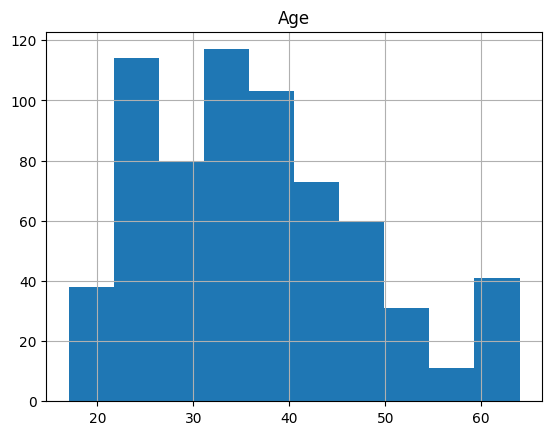

In [67]:
float_df = df.loc[raw_df.index, ["Age", "Level"]]
float_df.hist()

In [69]:
hister = KBinsDiscretizer(n_bins=5)
age_res = hister.fit_transform(np.array(float_df['Age']).reshape(-1,1)).toarray()
age_res = pd.DataFrame(data=age_res, columns=hister.get_feature_names_out(), index=float_df.index, dtype=int)

In [70]:
y = float_df["Level"].map({"Low" : 0, "High" : 1})

In [71]:
float_bin = age_res.merge(y, on='index')
res_df = bin_df.merge(right=float_bin, on='index')
res_df

,Gender_1,Gender_2,Air Pollution_1,Air Pollution_2,Air Pollution_3,Air Pollution_4,Air Pollution_5,Air Pollution_6,Air Pollution_7,Air Pollution_8,...,Snoring_4,Snoring_5,Snoring_6,Snoring_7,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,Level
index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
996,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
997,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
res_df.to_csv(data_cat / 'cancer_bin.csv')

# Датасет 2

In [ ]:
df = pd.read_csv(data_cat / "bike_buyers_clean.csv")
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [ ]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [ ]:
for c in df.columns.drop(["ID", "Income", "Age"]):
    print(c, pd.unique(df[c]))

Marital Status ['Married' 'Single']
Gender ['Female' 'Male']
Children [1 3 5 0 2 4]
Education ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner ['Yes' 'No']
Cars [0 1 2 4 3]
Commute Distance ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region ['Europe' 'Pacific' 'North America']
Purchased Bike ['No' 'Yes']


In [ ]:
raw_df = df[df.columns.drop(["ID", "Income", "Age", "Marital Status", "Home Owner", "Purchased Bike"])]
raw_df

,Gender,Children,Education,Occupation,Cars,Commute Distance,Region
0,Female,1,Bachelors,Skilled Manual,0,0-1 Miles,Europe
1,Male,3,Partial College,Clerical,1,0-1 Miles,Europe
2,Male,5,Partial College,Professional,2,2-5 Miles,Europe
3,Male,0,Bachelors,Professional,1,5-10 Miles,Pacific
4,Male,0,Bachelors,Clerical,0,0-1 Miles,Europe
...,...,...,...,...,...,...,...
995,Male,2,High School,Professional,2,2-5 Miles,North America
996,Male,4,Graduate Degree,Professional,0,2-5 Miles,North America
997,Male,2,Bachelors,Skilled Manual,0,0-1 Miles,North America
998,Male,3,Bachelors,Management,3,1-2 Miles,North America


In [ ]:
ohe = OneHotEncoder(dtype=int)
ohe.fit(raw_df)
ohe.categories_

[array(['Female', 'Male'], dtype=object),
 array([0, 1, 2, 3, 4, 5], dtype=int64),
 array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
        'Partial High School'], dtype=object),
 array(['Clerical', 'Management', 'Manual', 'Professional',
        'Skilled Manual'], dtype=object),
 array([0, 1, 2, 3, 4], dtype=int64),
 array(['0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles'],
       dtype=object),
 array(['Europe', 'North America', 'Pacific'], dtype=object)]

In [ ]:
res_columns = ohe.get_feature_names_out(raw_df.columns)
res_columns

array(['Gender_Female', 'Gender_Male', 'Children_0', 'Children_1',
       'Children_2', 'Children_3', 'Children_4', 'Children_5',
       'Education_Bachelors', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual',
       'Occupation_Professional', 'Occupation_Skilled Manual', 'Cars_0',
       'Cars_1', 'Cars_2', 'Cars_3', 'Cars_4',
       'Commute Distance_0-1 Miles', 'Commute Distance_1-2 Miles',
       'Commute Distance_10+ Miles', 'Commute Distance_2-5 Miles',
       'Commute Distance_5-10 Miles', 'Region_Europe',
       'Region_North America', 'Region_Pacific'], dtype=object)

In [ ]:
bin_df = ohe.transform(raw_df).toarray()

In [ ]:
bin_df.dtype

dtype('int32')

In [ ]:
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=df.index)

In [ ]:
bin_df

,Gender_Female,Gender_Male,Children_0,Children_1,Children_2,Children_3,Children_4,Children_5,Education_Bachelors,Education_Graduate Degree,...,Cars_3,Cars_4,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
996,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
997,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
998,0,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
float_df = df[["Income", "Age"]]
float_df

,Income,Age
0,40000,42
1,30000,43
2,80000,60
3,70000,41
4,30000,36
...,...,...
995,60000,54
996,70000,35
997,60000,38
998,100000,38


In [ ]:
prebin_df = df[["Marital Status", "Home Owner", "Purchased Bike"]]
prebin_df

,Marital Status,Home Owner,Purchased Bike
0,Married,Yes,No
1,Married,Yes,No
2,Married,No,No
3,Single,Yes,Yes
4,Single,No,Yes
...,...,...,...
995,Married,Yes,Yes
996,Single,Yes,Yes
997,Married,Yes,Yes
998,Single,No,No


In [ ]:
ohe = OneHotEncoder(dtype=int, drop='if_binary')
ohe.fit(prebin_df)
ohe.categories_

[array(['Married', 'Single'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [ ]:
res_columns = ohe.get_feature_names_out(prebin_df.columns)
bin2_df = ohe.transform(prebin_df).toarray()
bin2_df = pd.DataFrame(bin2_df, columns=res_columns, index=df.index)

In [ ]:
float_df

,Income,Age
0,40000,42
1,30000,43
2,80000,60
3,70000,41
4,30000,36
...,...,...
995,60000,54
996,70000,35
997,60000,38
998,100000,38


In [ ]:
res_df = float_df.merge(right=bin_df, left_index=True, right_index=True)
res_df = res_df.merge(right=bin2_df, left_index=True, right_index=True)
res_df

,Income,Age,Gender_Female,Gender_Male,Children_0,Children_1,Children_2,Children_3,Children_4,Children_5,...,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific,Marital Status_Single,Home Owner_Yes,Purchased Bike_Yes
0,40000,42,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,30000,43,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,80000,60,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3,70000,41,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,30000,36,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000,54,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
996,70000,35,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,1,1
997,60000,38,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
998,100000,38,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
res_df.to_csv(data_cat / 'bike_bin.csv')

# Датасет 3

In [ ]:
df = pd.read_csv(data_cat / "car.csv")

In [ ]:
df.dtypes

Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object

In [ ]:
for c in df.columns.drop([]):
    print(c, pd.unique(df[c]))

Buying_Price ['vhigh' 'high' 'med' 'low']
Maintenance_Price ['vhigh' 'high' 'med' 'low']
No_of_Doors ['2' '3' '4' '5more']
Person_Capacity ['2' '4' 'more']
Size_of_Luggage ['small' 'med' 'big']
Safety ['low' 'med' 'high']
Car_Acceptability ['unacc' 'acc' 'vgood' 'good']


In [ ]:
raw_df = df.drop('Car_Acceptability', axis=1)
raw_df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [ ]:
ohe = OneHotEncoder(dtype=int)
ohe.fit(raw_df)
ohe.categories_

[array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['big', 'med', 'small'], dtype=object),
 array(['high', 'low', 'med'], dtype=object)]

In [ ]:
res_columns = ohe.get_feature_names_out(raw_df.columns)
res_columns

array(['Buying_Price_high', 'Buying_Price_low', 'Buying_Price_med',
       'Buying_Price_vhigh', 'Maintenance_Price_high',
       'Maintenance_Price_low', 'Maintenance_Price_med',
       'Maintenance_Price_vhigh', 'No_of_Doors_2', 'No_of_Doors_3',
       'No_of_Doors_4', 'No_of_Doors_5more', 'Person_Capacity_2',
       'Person_Capacity_4', 'Person_Capacity_more', 'Size_of_Luggage_big',
       'Size_of_Luggage_med', 'Size_of_Luggage_small', 'Safety_high',
       'Safety_low', 'Safety_med'], dtype=object)

In [ ]:
bin_df = ohe.transform(raw_df).toarray()

In [ ]:
bin_df.dtype

dtype('int32')

In [ ]:
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=df.index)

In [ ]:
bin_df

,Buying_Price_high,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,...,No_of_Doors_5more,Person_Capacity_2,Person_Capacity_4,Person_Capacity_more,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [ ]:
y = df['Car_Acceptability'].map({'unacc': 0, 'acc' : 1, 'good' : 2, 'vgood' : 3})

In [ ]:
res_df = bin_df.merge(right=y, left_index=True, right_index=True)
res_df

,Buying_Price_high,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,...,Person_Capacity_2,Person_Capacity_4,Person_Capacity_more,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med,Car_Acceptability
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,2
1724,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,3
1725,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1726,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,2


In [ ]:
res_df.to_csv(data_cat / 'car_bin.csv')